In [4]:
import numpy as np
import simulator, grn
import matplotlib.pyplot as plt
from components import *

# NPMP project 2: LSFR and random number generation

## Necessary component circuits for a LSFR:
- XOR gate
- D flip-flop


## XOR gate

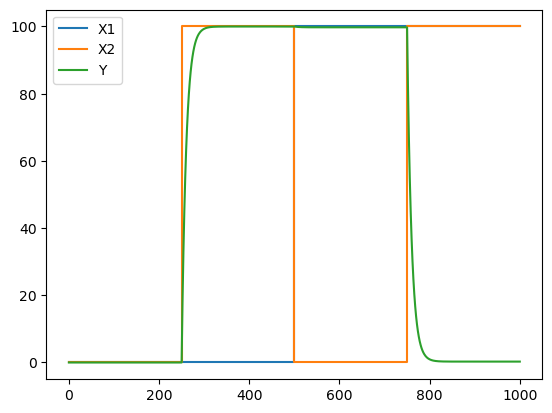

In [2]:
xor_grn = grn.grn()
xor_grn.add_input_species("X1")
xor_grn.add_input_species("X2")

xor_grn.add_species("Y", 0.1)

regulators = [{'name': 'X1', 'type': -1, 'Kd': 5, 'n': 2},
                {'name': 'X2', 'type': 1, 'Kd': 5, 'n': 3}]
products = [{'name': 'Y'}]
xor_grn.add_gene(10, regulators, products)

regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
                {'name': 'X2', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'Y'}]
xor_grn.add_gene(10, regulators, products)

T, Y = simulator.simulate_sequence(xor_grn, [(0,0), (0,100), (100,0), (100,100)], t_single = 250)

## D flip-flop
We will build a D flip-flop progressively, starting from a rs flipflop, then a D latch, and finally a D flip-flop.

### RS flip-flop

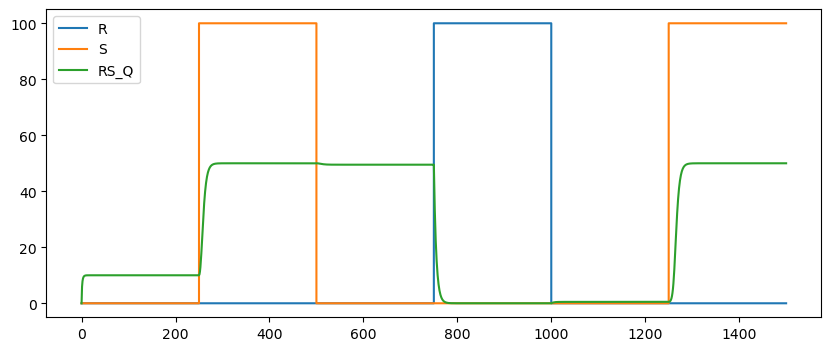

In [6]:
rsff_grn = grn.grn()
rsff_grn.add_input_species("R")
rsff_grn.add_input_species("S")
add_rs_flip_flop(rsff_grn, "RS", "R", "S")


inputs = [(0, 0), (0, 100), (0, 0), (100, 0), (0, 0), (0, 100)]
plt.figure(figsize=(10, 4))
T, Y = simulator.simulate_sequence(rsff_grn, inputs, t_single = 250, displayed=['R','S','RS_Q'])

## D-latch

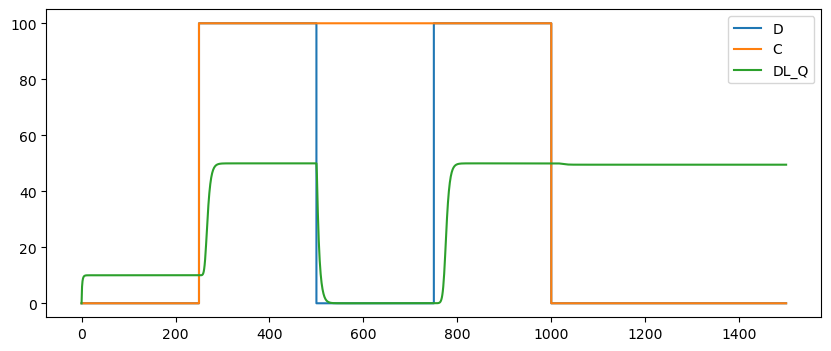

In [8]:
dlatch_grn = grn.grn()

dlatch_grn.add_input_species("D")
dlatch_grn.add_input_species("C")

add_d_latch(dlatch_grn, "DL", "D", "C")

inputs = [(0, 0), (100, 100), (0, 100), (100, 100), (0,0), (0,0)]
plt.figure(figsize=(10, 4))
T, y = simulator.simulate_sequence(dlatch_grn, inputs, t_single = 250, plot_on=True, displayed=['D', 'C', 'DL_Q'])


### D flipflop (falling edge triggered)

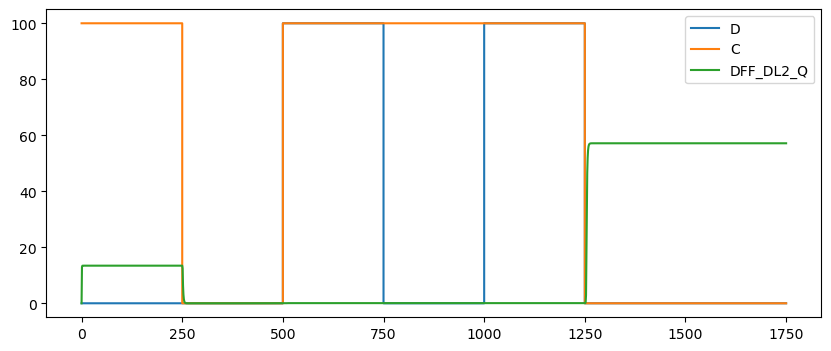

In [24]:
dff_grn = grn.grn()

alpha = 40
delta = 0.7
kd = 10
n = 4


dff_grn.add_input_species("D")
dff_grn.add_input_species("C")

add_d_flip_flop(dff_grn, "DFF", "D", "C")

inputs = [(0,100),(0, 0), (100, 100), (0, 100), (100,100), (0,0), (0,0)]
plt.figure(figsize=(10, 4))
T, y = simulator.simulate_sequence(dff_grn, inputs, t_single = 250, plot_on=True, displayed=['D', 'C', 'DFF_DL2_Q'])


## Johnson counter (falling edge trigger na uri)

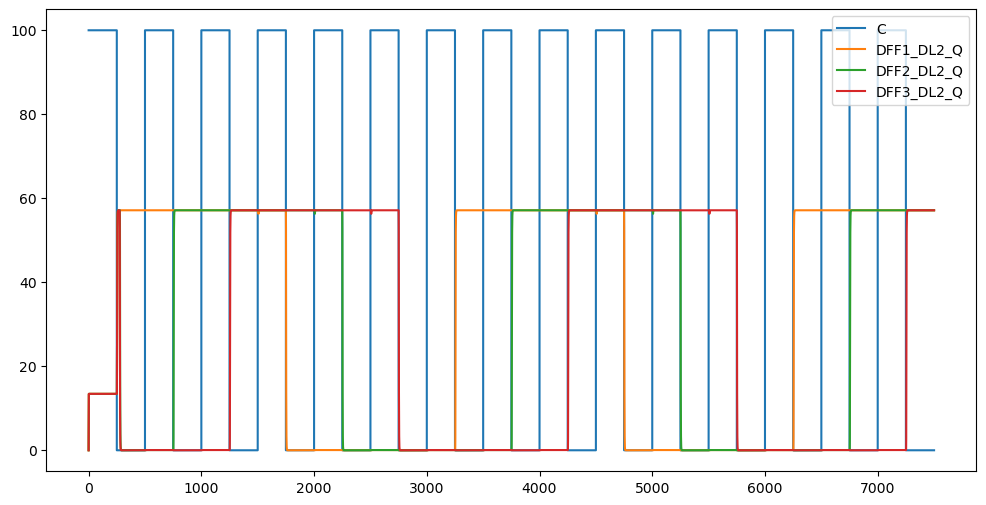

In [40]:
alpha = 40
delta = 0.7
kd = 10
n = 4

my_grn = grn.grn()
my_grn.add_input_species("C")
my_grn.add_species("D", delta)

# INITIAL STATE setup

add_d_flip_flop(my_grn, "DFF1", "D", "C", kd, n, delta, alpha)
add_d_flip_flop(my_grn, "DFF2", "DFF1_DL2_Q", "C", kd, n, delta, alpha)
add_d_flip_flop(my_grn, "DFF3", "DFF2_DL2_Q", "C", kd, n, delta, alpha)

my_grn.add_gene(alpha, [
    {'name': 'DFF3_DL2_Q_', 'type': 1, 'Kd': kd, 'n': n}
], [{'name': "D"}])

inputs = [(100), (0)] * 15
plt.figure(figsize=(12, 6))
T, y = simulator.simulate_sequence(my_grn, inputs, t_single = 250, displayed=['C', 'DFF1_DL2_Q', 'DFF2_DL2_Q', 'DFF3_DL2_Q'])